ave 210.0
ave 257.5
[47.243, 47.243, -45.836, 235.424]


C:\Users\okdmlab\python\LP(20181125)\SAISYOUKA.py:22: RuntimeWarning: overflow encountered in double_scalars
  E+=w2*(abs(X[i]-X[i+1]))*(1-(1 / (1 + e**(-X[p]))))+c * (1 / (1 + e**(-X[p])))+(1 / (1 + e**(-X[p])))*(1-(1 / (1 + e**(-X[p]))))
C:\Users\okdmlab\python\LP(20181125)\SAISYOUKA.py:26: RuntimeWarning: overflow encountered in double_scalars
  E+=w2*(abs(X[i+(j*x)]-X[i+(j*x)+x])) * (1-(1 / (1 + e**(-X[p]))))+c * (1 / (1 + e**(-X[p])))+(1 / (1 + e**(-X[p])))*(1-(1 / (1 + e**(-X[p]))))


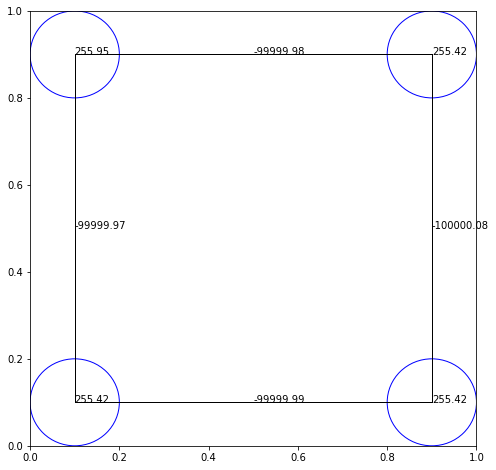

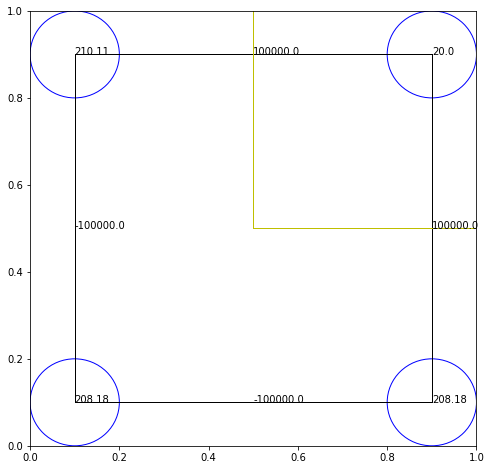

NO [[[255.42204142577137, 255.42203262822483, 255.94873234288337, 255.42199597261612, -99999.9855969145, -99999.98139419919, -99999.97115501124, -100000.08266638237]]]
YE [[[208.17898086539668, 208.178913979724, 210.11285502044734, 19.997946363672874, -99999.99749651636, 100000.00048157491, -99999.99908700495, 100000.00079825804]]]
0 [47.243, 47.243, -45.836, 235.424]
1 [-150.43200000000002, -150.427, 147.413, 225.424]
2 [-104.90300000000002, -105.21099999999998, 105.822, 461.245]
3 [-60.07500000000002, -60.390999999999984, 65.30799999999999, 696.684]
4 [-14.90600000000002, -15.348999999999982, 23.75699999999999, 932.334]
5 [30.63899999999998, 30.06500000000002, -17.52900000000001, 1167.768]
6 [25.38799999999998, 24.817000000000018, -11.172000000000011, 1350.314]
7 [5.232999999999979, 4.684000000000019, 10.457999999999988, 1517.846]
8 [41.86799999999998, 41.31900000000002, -24.193000000000016, 1742.976]
9 [-8.370000000000019, -8.952999999999982, 27.345999999999986, 1879.9440000000002]


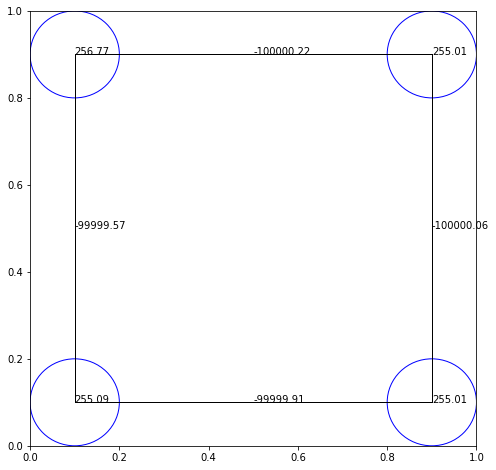

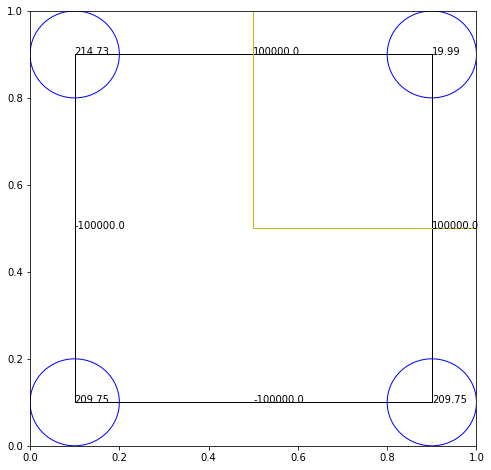

In [5]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python
import SAISYOUKA_ORIGIN
import imp
imp.reload(SAISYOUKA_ORIGIN)
import MRF_PLOT1
import imp
imp.reload(MRF_PLOT1)
import syokiti
import imp
imp.reload(syokiti)
import reliability
import imp
imp.reload(reliability)
from collections import defaultdict
import numpy as np
import pandas as pd
#%matplotlib inline
np.random.seed(21212)
import random
np.set_printoptions(threshold=np.inf)
from __future__ import absolute_import, division, print_function, unicode_literals

#x*yのマルコフモデル
x = 2
y = 2
    
if __name__ == '__main__':
    #メッシュの初期設定
    z = x*(y-1)+y*(x-1)
    Line = [0]*z
    
    SIN_node = [20,20,20,20]
    
    SENZAI_node = SIN_node + Line
    
    syokiSENZAI_node = SIN_node + Line
    
    low_node = [10,10,1000,10]
    None_high_node = [None,None,None,None]
    high_node = [None,None,None,20]
    
    #初期値設定(高精度あり)
    SENZAI_node = syokiti.default(x,y,low_node,high_node,SIN_node,Line)
    #初期値設定（高精度なし）
    None_SENZAI_node = syokiti.default(x,y,low_node,None_high_node,SIN_node,Line)
    
    reliability_value=[0]*(x*y)
    for i in range(z):
        if(low_node[i]==None):
            reliability_value[i]=None
    
    #重み（高精度、低精度、隣接）
    w0=reliability_value
    w1=100
    w2=0.5
    
    #ラインププロセスの閾値
    c=40
    
    #低精度のみの推定と，高精度を含んだ推定  
    back =SAISYOUKA_ORIGIN.ENEGY(x,y,SENZAI_node,None_SENZAI_node,low_node,high_node,None_high_node,w0,w1,w2,c,Line)
    item = back[0]
    None_item=back[1] 
    
    #信頼度作成
    trust=reliability.create_reliability(x,y,low_node,item,None_item)
    print(trust)
    
    #描画
    MRF_PLOT1.MRF_PLOT(None_item,x,y)
    MRF_PLOT1.MRF_PLOT(item,x,y)
    
#################################################### 

    #不連続の固定
    for k in range(z):
        None_SENZAI_node[k+x*y]=None_item[0][0][k+x*y]
        SENZAI_node[k+x*y]=item[0][0][k+x*y]
    
    print('NO',None_item)
    print('YE',item)
    
    #w0=[0]*(x*y)
    
    for k in range(10):
        for i in range(x*y):
            if(w0[i]!=None and trust[i]!=None):
                w0[i] = w0[i]+trust[i]
        print(k,w0)
        #print('t',trust)
        back =SAISYOUKA_ORIGIN.ENEGY(x,y,SENZAI_node,None_SENZAI_node,low_node,high_node,None_high_node,w0,w1,w2,c,Line)
        item = back[0]
        None_item=back[1] 
        trust=reliability.create_reliability(x,y,low_node,item,None_item)
    #print('trust',trust)
    MRF_PLOT1.MRF_PLOT(None_item,x,y)
    MRF_PLOT1.MRF_PLOT(item,x,y) 


## 